<a href="https://colab.research.google.com/github/ferreirabruno7/machine_learning/blob/master/prestacao_de_contas_tse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importação de bibliotecas de extração de dados e suporte
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import glob
import pandas as pd
import functools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#download e extração dados de votos

zipurl = 'http://agencia.tse.jus.br/estatistica/sead/odsele/votacao_candidato_munzona/votacao_candidato_munzona_2018.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('C:/Users/Bruno Ferreira/Documents/dados_eleitorais/votacao')

In [0]:
#prestação de contas da campanha
zipurl = 'http://agencia.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2018.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('C:/Users/Bruno Ferreira/Documents/dados_eleitorais/prestacao_de_contas')

In [0]:
#junção de dados em único data_frame das receitas
df = pd.concat(map(functools.partial(pd.read_csv, sep='|', delimiter = ';', encoding='iso-8859-1', decimal=','), 
                    glob.glob("C:/Users/Bruno Ferreira/Documents/dados_eleitorais/prestacao_de_contas/*.csv")))

In [0]:
#junção de dados em único data_frame dos votos
df2 = pd.concat(map(functools.partial(pd.read_csv, sep='|', delimiter = ';', encoding='iso-8859-1', decimal=','), 
                    glob.glob("C:/Users/Bruno Ferreira/Documents/dados_eleitorais/votacao/*.csv")))

In [0]:
#informações dataframe prestação de contas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648342 entries, 0 to 3926
Data columns (total 57 columns):
DT_GERACAO                     648342 non-null object
HH_GERACAO                     648342 non-null object
ANO_ELEICAO                    648342 non-null int64
CD_TIPO_ELEICAO                648342 non-null int64
NM_TIPO_ELEICAO                648342 non-null object
CD_ELEICAO                     648342 non-null int64
DS_ELEICAO                     648342 non-null object
DT_ELEICAO                     648342 non-null object
ST_TURNO                       648342 non-null int64
TP_PRESTACAO_CONTAS            648342 non-null object
DT_PRESTACAO_CONTAS            648342 non-null object
SQ_PRESTADOR_CONTAS            648342 non-null int64
SG_UF                          648342 non-null object
SG_UE                          648342 non-null object
NM_UE                          648342 non-null object
NR_CNPJ_PRESTADOR_CONTA        648342 non-null int64
CD_CARGO                       64

In [0]:
#informações dataframe votos por seção
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122096 entries, 0 to 43819
Data columns (total 38 columns):
DT_GERACAO                  object
HH_GERACAO                  object
ANO_ELEICAO                 int64
CD_TIPO_ELEICAO             int64
NM_TIPO_ELEICAO             object
NR_TURNO                    int64
CD_ELEICAO                  int64
DS_ELEICAO                  object
DT_ELEICAO                  object
TP_ABRANGENCIA              object
SG_UF                       object
SG_UE                       object
NM_UE                       object
CD_MUNICIPIO                int64
NM_MUNICIPIO                object
NR_ZONA                     int64
CD_CARGO                    int64
DS_CARGO                    object
SQ_CANDIDATO                int64
NR_CANDIDATO                int64
NM_CANDIDATO                object
NM_URNA_CANDIDATO           object
NM_SOCIAL_CANDIDATO         object
CD_SITUACAO_CANDIDATURA     int64
DS_SITUACAO_CANDIDATURA     object
CD_DETALHE_SITUACAO_CAN

In [0]:
#deixando nome único com base no datraframe da receira
numero_partido = df['NM_CANDIDATO'].unique()

In [0]:
numero_partido

array(['BLANDINA MARIA MENEZES DA SILVA E SILVA',
       'JOAO BATISTA PEREIRA DA SILVA', 'ELY ALVES VIEIRA', ...,
       'RENE CASEMIRO', 'NAIARA LOURENÇO',
       'THIAGO GOMES BANDEIRA LACERDA'], dtype=object)

In [0]:
#deixando nome único com base no datraframe da receira

dataframe=pd.DataFrame(numero_partido, columns=['NM_CANDIDATO']) 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24301 entries, 0 to 24300
Data columns (total 1 columns):
NM_CANDIDATO    24301 non-null object
dtypes: object(1)
memory usage: 189.9+ KB


In [0]:
#construindo novo data frame com base no nome dos candidatos e receita
result = pd.merge(dataframe,
                 df[['NM_CANDIDTO', 'VR_RECEITA']],
                 on='NM_CANDIDATO')
result.head(5)

,NM_CANDIDATO,VR_RECEITA
0,BLANDINA MARIA MENEZES DA SILVA E SILVA,100000.0
1,BLANDINA MARIA MENEZES DA SILVA E SILVA,8000.0
2,BLANDINA MARIA MENEZES DA SILVA E SILVA,10000.0
3,BLANDINA MARIA MENEZES DA SILVA E SILVA,49986.8
4,BLANDINA MARIA MENEZES DA SILVA E SILVA,100000.0


In [0]:
#inspeciona novo data frame
geral_receita = result.groupby('NM_CANDIDATO',  as_index=False).agg({"VR_RECEITA": "sum"})
geral_receita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24301 entries, 0 to 24300
Data columns (total 2 columns):
NM_CANDIDATO    24301 non-null object
VR_RECEITA      24301 non-null float64
dtypes: float64(1), object(1)
memory usage: 569.6+ KB


In [0]:
#construindo data frame com base nos nomes do candidatos e quantidade de votos por UF

geral_votos = df2.groupby(['NM_CANDIDATO','SG_UF',  'DS_CARGO', 'SG_PARTIDO'], as_index=False).agg({"QT_VOTOS_NOMINAIS": "sum"})
geral_votos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26768 entries, 0 to 26767
Data columns (total 5 columns):
NM_CANDIDATO         26768 non-null object
SG_UF                26768 non-null object
DS_CARGO             26768 non-null object
SG_PARTIDO           26768 non-null object
QT_VOTOS_NOMINAIS    26768 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [0]:
#visualiza dataframe
geral_votos.head()

,NM_CANDIDATO,SG_UF,DS_CARGO,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,SAYONARA DE ARAUJO PESSOA,SC,Deputado Estadual,PT,8488
1,AAVA SANTIAGO AGUIAR,GO,Deputado Estadual,AVANTE,9786
2,ABDAEL AMBRUSTER,SP,Deputado Estadual,PT,1488
3,ABDALA HABIB FRAXE JUNIOR,AM,Deputado Estadual,PODE,37430
4,ABDIAS DAMASCENO DA SILVA,AC,Deputado Estadual,PSL,364


In [0]:
#junção dataframe de votos e receita total 
votos_valor = pd.merge(geral_receita,
                 geral_votos[['QT_VOTOS_NOMINAIS', 'SG_UF', 'NM_CANDIDATO',  'DS_CARGO', 'SG_PARTIDO']],
                 on='NM_CANDIDATO')
votos_valor.head()

,NM_CANDIDATO,VR_RECEITA,QT_VOTOS_NOMINAIS,SG_UF,DS_CARGO,SG_PARTIDO
0,AAVA SANTIAGO AGUIAR,37391.00,9786,GO,Deputado Estadual,AVANTE
1,ABDAEL AMBRUSTER,7432.46,1488,SP,Deputado Estadual,PT
2,ABDALA HABIB FRAXE JUNIOR,249233.34,37430,AM,Deputado Estadual,PODE
3,ABDIAS DE OLIVEIRA SILVA,5200.00,964,PE,Deputado Federal,DC
4,ABEILARD GOULART DE SOUZA FILHO,191472.74,18900,RJ,Deputado Federal,PDT


In [0]:
votos_valor['QT_VOTOS_NOMINAIS'].fillna(value=votos_valor['QT_VOTOS_NOMINAIS'].median(), inplace=True)
votos_valor['VR_RECEITA'].fillna(value=votos_valor['VR_RECEITA'].median(), inplace=True)
votos_valor[votos_valor['VR_RECEITA']>0]['VR_RECEITA'].mean()
votos_valor.loc[votos_valor.VR_RECEITA <= 0, 'VR_RECEITA'] = 795838
votos_valor.loc[votos_valor.QT_VOTOS_NOMINAIS <= 0, 'QT_VOTOS_NOMINAIS'] = 1


In [0]:
#criar nova feature custo_medio
votos_valor['custo_medio'] = votos_valor['VR_RECEITA'] / votos_valor['QT_VOTOS_NOMINAIS']

In [0]:
votos_valor['custo_medio'].mean()

2479.8320423220016

In [0]:
#informações do novo dataframe

votos_valor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21129 entries, 0 to 21128
Data columns (total 7 columns):
NM_CANDIDATO         21129 non-null object
VR_RECEITA           21129 non-null float64
QT_VOTOS_NOMINAIS    21129 non-null int64
SG_UF                21129 non-null object
DS_CARGO             21129 non-null object
SG_PARTIDO           21129 non-null object
custo_medio          21129 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.9+ MB


In [0]:
#DESCRIBE  do dataframe
votos_valor.describe()

,VR_RECEITA,QT_VOTOS_NOMINAIS,custo_medio
count,2.112900e+04,2.112900e+04,2.112900e+04
mean,7.958384e+05,6.271924e+04,2.479832e+03
std,6.616508e+06,7.479968e+05,4.501164e+04
min,2.000000e-02,1.000000e+00,1.228501e-05
25%,7.003740e+03,5.600000e+02,4.585924e+00
50%,2.696000e+04,1.992000e+03,1.254955e+01
75%,1.437500e+05,1.090400e+04,3.851091e+01
max,1.140600e+08,5.536807e+07,2.662525e+06


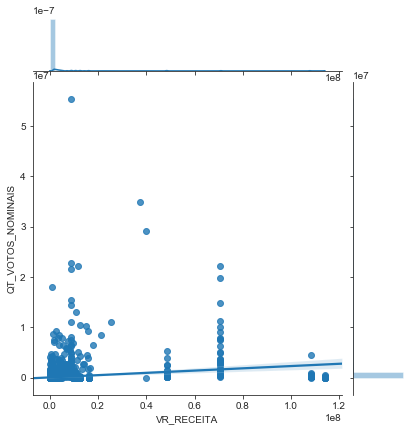

In [0]:
#relação votos receita 
sns.jointplot(x='VR_RECEITA', y='QT_VOTOS_NOMINAIS', data=votos_valor, kind='reg')


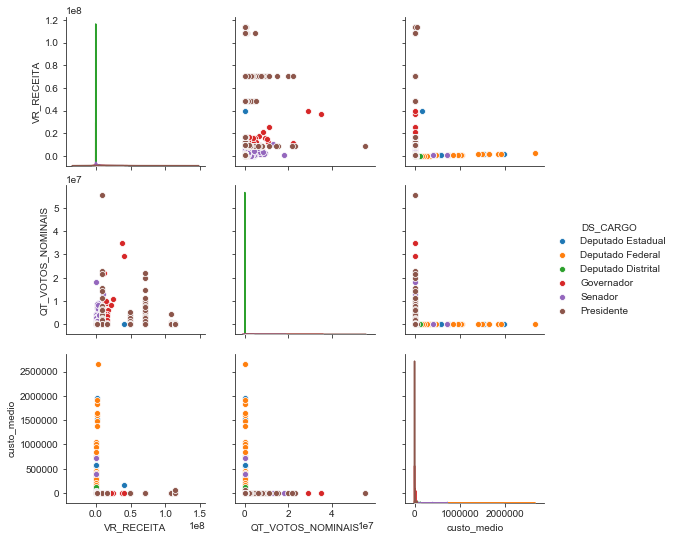

In [0]:
##exploração de dados entre sim
sns.pairplot(votos_valor, hue='DS_CARGO')


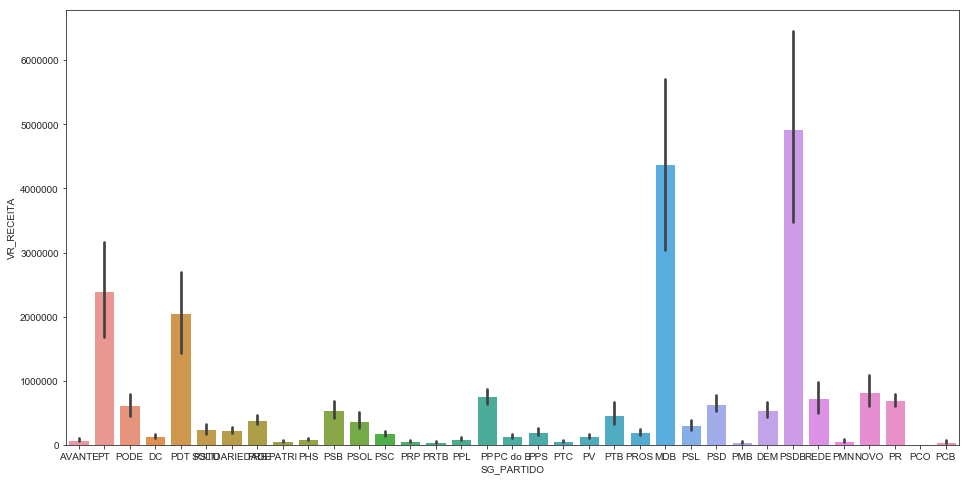

In [0]:
#relação partido valor receita brasil
sns.set_style('ticks')
plt.figure(figsize=(16,8))
sns.barplot(x='SG_PARTIDO', y= 'VR_RECEITA', data=votos_valor)

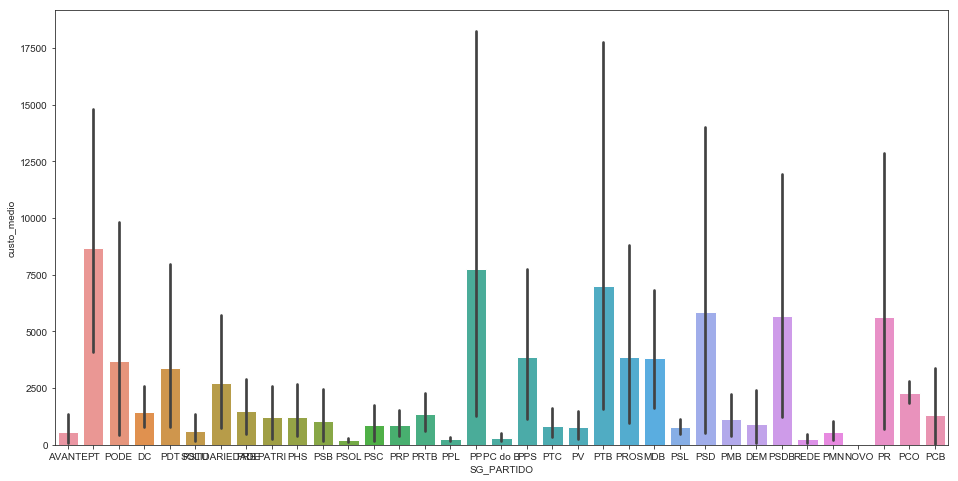

In [0]:
#relação partido valor receita brasil
sns.set_style('ticks')
plt.figure(figsize=(16,8))
sns.barplot(x='SG_PARTIDO', y= 'custo_medio', data=votos_valor)

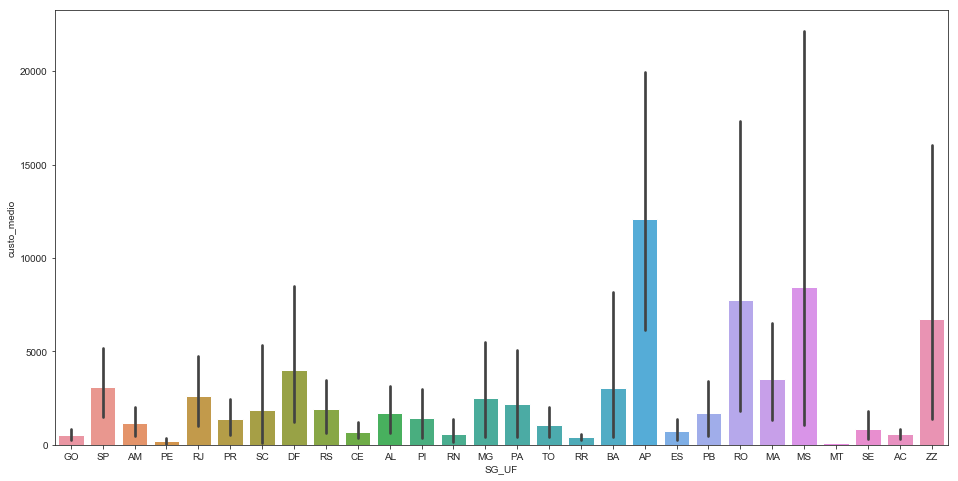

In [0]:
#relação partido valor receita brasil
sns.set_style('ticks')
plt.figure(figsize=(16,8))
sns.barplot(x='SG_UF', y= 'custo_medio', data=votos_valor)

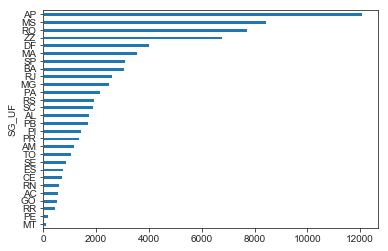

In [0]:
#custo médio por estado
votos_valor.groupby("SG_UF").mean()["custo_medio"].sort_values().plot(kind='barh')


In [0]:
#custo médio por estado
votos_valor.groupby("SG_UF").mean()["custo_medio"].sort_values()



SG_UF
MT       95.350464
PE      177.416865
RR      426.137576
GO      510.528108
AC      557.955462
RN      578.783102
CE      706.640889
ES      747.614718
SE      853.213816
TO     1062.757134
AM     1160.528600
PR     1357.359269
PI     1421.641809
PB     1678.040040
AL     1718.041081
SC     1882.009513
RS     1923.223577
PA     2163.701023
MG     2486.560769
RJ     2606.668935
BA     3039.630293
SP     3090.270861
MA     3541.590192
DF     3991.896792
ZZ     6756.505534
RO     7733.646532
MS     8419.268757
AP    12077.620151
Name: custo_medio, dtype: float64

In [0]:
#custo médio candidato e partido

votos_valor.groupby(['NM_CANDIDATO','SG_PARTIDO']).mean()["custo_medio"].sort_values()


NM_CANDIDATO                          SG_PARTIDO   
PAULO FERREIRA MARTINS                PHS              1.228501e-05
VANTUIL SILVA OLIVEIRA                PPL              3.131524e-05
PEDRO RIBEIRO FILHO                   PSL              5.977983e-04
EDUARDO LIMA DE SOUZA                 NOVO             9.029345e-03
FABIO TOBIAS DE ARAUJO                AVANTE           1.080740e-02
JOSE RIBAMAR FRAZAO OLIVEIRA          REDE             1.123343e-02
ANA CRISTINA SIQUEIRA VALLE           PODE             1.287596e-02
MARCOS ANTONIO DO NASCIMENTO          PRTB             1.650165e-02
JOSÉ DE OLIVEIRA LIMA                 PSL              1.771812e-02
CLEVERSON FIUZA ALVES                 NOVO             1.968504e-02
MARCOS PRUDENTE CAJE                  PTC              2.114165e-02
MOIRA LÁZARO DA SILVA                 REDE             2.593963e-02
IVAN RODRIGUES SANTANA                NOVO             2.742947e-02
EDUARDO ALEXANDRO CASSINI             PSL              3.093485e